# Wine Quality Ananlysis 



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wine_data = pd.read_csv("https://raw.githubusercontent.com/hariharan1995/wine_quality_analysis/main/winequalityN.csv")

In [3]:
wine_data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
wine_data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AC8009A220>,
      dtype=object)

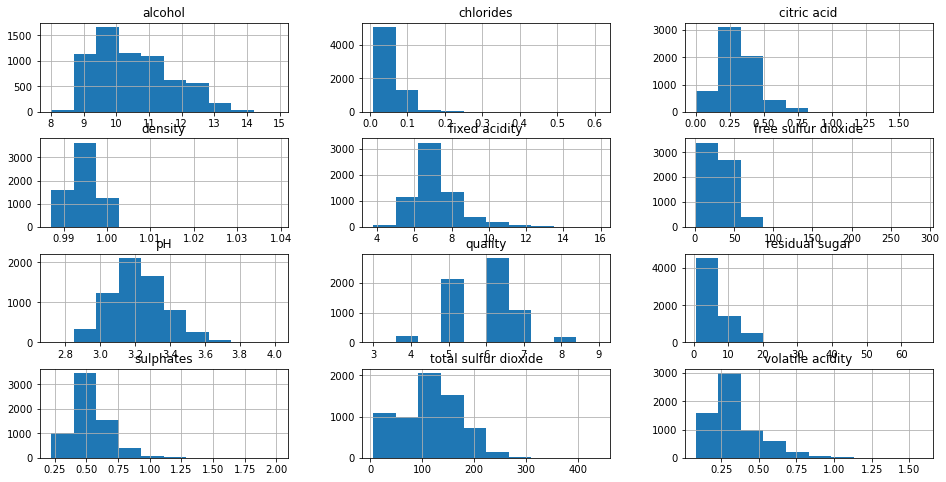

In [7]:

wine_data.hist(figsize=(16,8))

Check the correlation for each of the fields

In [8]:
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
volatile acidity,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
citric acid,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
residual sugar,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
chlorides,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
free sulfur dioxide,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
total sulfur dioxide,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366
sulphates,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,0.191248,1.000000,-0.003261,0.038729


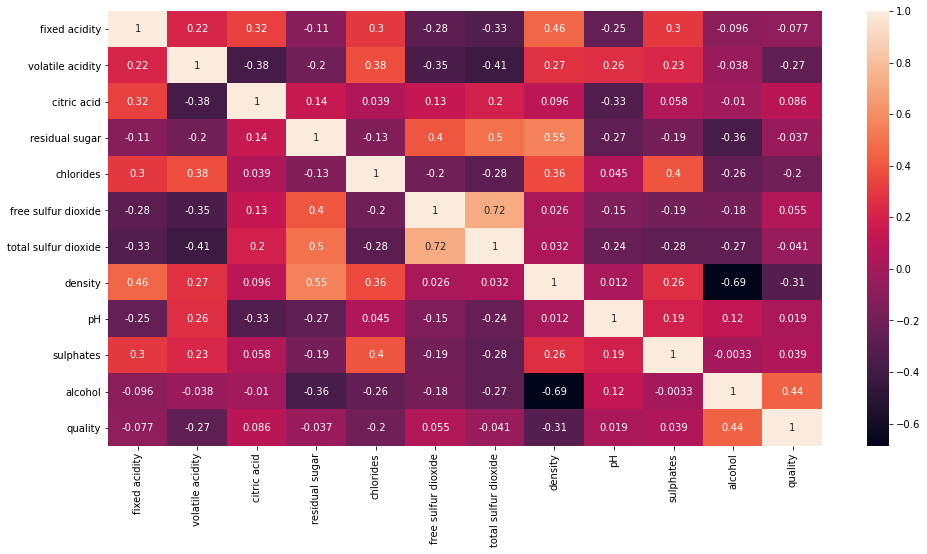

In [9]:
plt.figure(figsize=(16,8))
sns.heatmap(wine_data.corr(), annot=True)

From the above correlation plot for the given dataset for wine quality prediction, we can easily see which items are related strongly with each other and which items are related weekly with each other. For Example,

The strongly correlated items are :
1.fixed acidity and citric acid. 2.free sulphur dioxide and total sulphor dioxide. 3.fixed acidity and density. 4. alcohol and quality.
so, from above points there is a clear inference that alcohol is the most important characteristic to determine the quality of wine.

The weekly correlated items are :
1.citric acid and volatile acidity. 2.fixed acidity and ph. 3.density and alcohol.

These are some relations which do not depend on each other at all.

# EDA

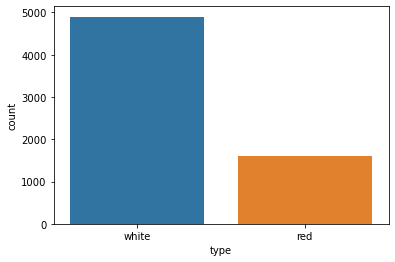

In [10]:
sns.countplot(wine_data['type'])

In [11]:
wine_data['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

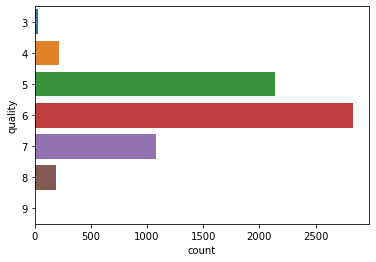

In [12]:
sns.countplot(y= 'quality',data=wine_data)

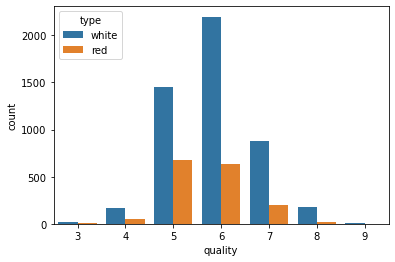

In [13]:
sns.countplot(x='quality', hue='type',data=wine_data)

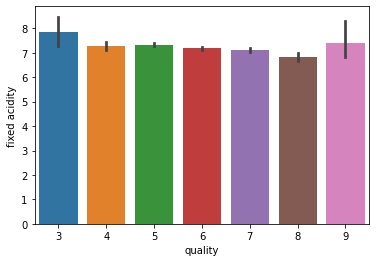

In [14]:
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine_data)

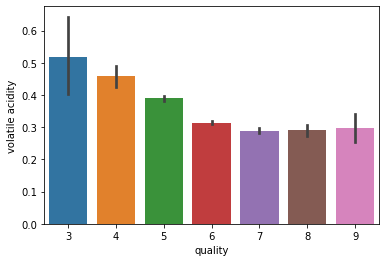

In [15]:
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_data)

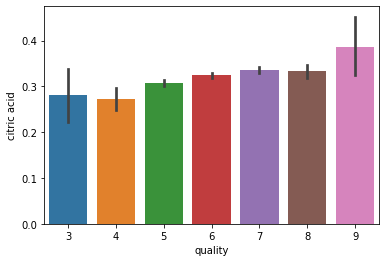

In [16]:
sns.barplot(x = 'quality', y = 'citric acid', data = wine_data)

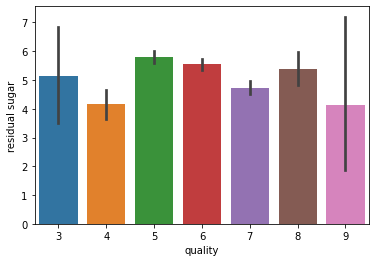

In [17]:
sns.barplot(x = 'quality', y = 'residual sugar', data = wine_data)

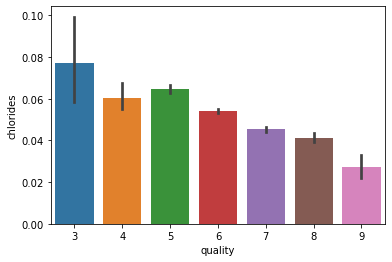

In [18]:
sns.barplot(x = 'quality', y = 'chlorides', data = wine_data)

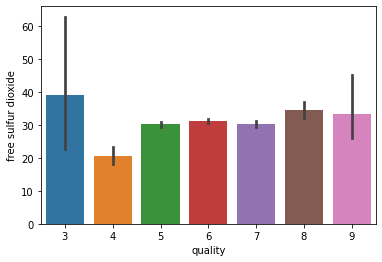

In [19]:
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine_data)

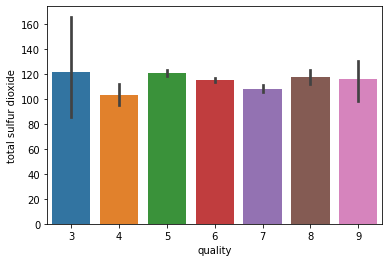

In [20]:
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine_data)

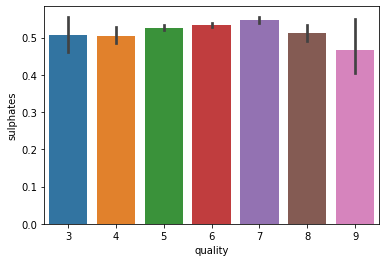

In [21]:
sns.barplot(x = 'quality', y = 'sulphates', data = wine_data)

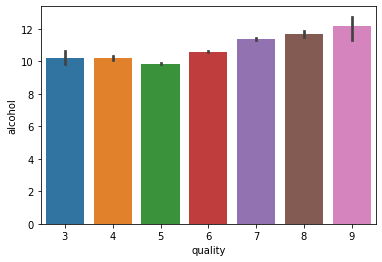

In [22]:
sns.barplot(x = 'quality', y = 'alcohol', data = wine_data)

Fixed acidity, free sulfur dioxide, total sulfur dioxide, Sulphates, resuidual sugar does not give any specification to classify the Quality of wine.

Quality Of wine increases when 
  1. volatile acidity decreases
  2. chlorides decreases
  3. citric acid increases
  4. alcohol increases


# Data Preproccessing

In [23]:
wine_data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [24]:
wine_data['fixed acidity'] = wine_data['fixed acidity'].fillna(wine_data['fixed acidity'].mean())
wine_data['volatile acidity'] = wine_data['volatile acidity'].fillna(wine_data['volatile acidity'].mean())
wine_data['citric acid'] = wine_data['citric acid'].fillna(wine_data['citric acid'].mean())
wine_data['residual sugar'] = wine_data['residual sugar'].fillna(wine_data['residual sugar'].mean())
wine_data['chlorides'] = wine_data['chlorides'].fillna(wine_data['chlorides'].mean())
wine_data['pH'] = wine_data['pH'].fillna(wine_data['pH'].mean())
wine_data['sulphates'] = wine_data['sulphates'].fillna(wine_data['sulphates'].mean())
wine_data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [25]:
wine_data_updated = wine_data.drop('type', axis = 1)

In [26]:
wine_data_updated.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [27]:
wine_data_updated['quality'] = wine_data_updated['quality'].map({3 : 0, 4 : 0, 5: 0, 6: 1, 7: 1, 8: 2, 9: 2})

In [28]:
wine_data_updated

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,1
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,1
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,0


In [29]:
wine_data_updated['fixed acidity'] = wine_data_updated['fixed acidity'].fillna(wine_data['fixed acidity'].mean())
wine_data_updated['volatile acidity'] = wine_data_updated['volatile acidity'].fillna(wine_data['volatile acidity'].mean())
wine_data_updated['citric acid'] = wine_data_updated['citric acid'].fillna(wine_data['citric acid'].mean())
wine_data_updated['residual sugar'] = wine_data_updated['residual sugar'].fillna(wine_data['residual sugar'].mean())
wine_data_updated['chlorides'] = wine_data_updated['chlorides'].fillna(wine_data['chlorides'].mean())
wine_data_updated['pH'] = wine_data_updated['pH'].fillna(wine_data['pH'].mean())
wine_data_updated['sulphates'] = wine_data_updated['sulphates'].fillna(wine_data['sulphates'].mean())
wine_data_updated.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [30]:
wine_data_updated

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,1
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,1
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,0


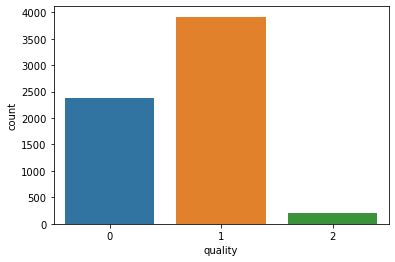

In [31]:
sns.countplot(wine_data_updated['quality'])

# Splitting Training and Testing Data

In [32]:
X = wine_data_updated.iloc[:, :-1].values
y = wine_data_updated.iloc[:, 11].values

In [33]:
X

array([[ 7.   ,  0.27 ,  0.36 , ...,  3.   ,  0.45 ,  8.8  ],
       [ 6.3  ,  0.3  ,  0.34 , ...,  3.3  ,  0.49 ,  9.5  ],
       [ 8.1  ,  0.28 ,  0.4  , ...,  3.26 ,  0.44 , 10.1  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [34]:
y

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train

array([[ 6.1       ,  0.32      ,  0.25      , ...,  3.42      ,
         0.97      , 10.6       ],
       [ 5.9       ,  0.395     ,  0.13      , ...,  3.62      ,
         0.67      , 12.4       ],
       [ 7.2       ,  0.605     ,  0.02      , ...,  3.46      ,
         0.53      , 11.8       ],
       ...,
       [ 6.        ,  0.17      ,  0.33      , ...,  3.32      ,
         0.58      , 10.13333333],
       [ 7.7       ,  0.32      ,  0.61      , ...,  3.        ,
         0.54      ,  9.3       ],
       [ 9.        ,  0.26      ,  0.34      , ...,  3.08      ,
         0.5       , 10.6       ]])

In [37]:
from sklearn.preprocessing import StandardScaler


In [38]:
X_test

array([[ 4.9  ,  0.235,  0.27 , ...,  3.07 ,  0.5  ,  9.4  ],
       [ 6.7  ,  0.54 ,  0.28 , ...,  3.27 ,  0.37 ,  9.   ],
       [ 6.9  ,  0.22 ,  0.39 , ...,  3.11 ,  0.33 , 12.5  ],
       ...,
       [ 7.1  ,  0.47 ,  0.   , ...,  3.4  ,  0.58 , 10.9  ],
       [ 6.   ,  0.39 ,  0.26 , ...,  3.41 ,  0.5  , 10.8  ],
       [ 7.7  ,  0.54 ,  0.26 , ...,  3.26 ,  0.59 ,  9.7  ]])

In [39]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training Models & Prediction

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model = LogisticRegression()

In [42]:
model.fit(X_train, y_train)

LogisticRegression()

In [43]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [44]:
print("Cross validation score :", cross_val_score(model,X, y, cv=10))

C:\Users\harih\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\harih\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross validation score : [0.59692308 0.62769231 0.65846154 0.64461538 0.67692308 0.66923077
 0.68615385 0.80739599 0.56548536 0.71032357]


C:\Users\harih\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [46]:
print("Accuracy Score", accuracy_score(y_test, y_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Accuracy Score 0.69
Confusion Matrix
[[273 232   0]
 [129 624   0]
 [  1  41   0]]


In [47]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.68      0.54      0.60       505
           1       0.70      0.83      0.76       753
           2       0.00      0.00      0.00        42

    accuracy                           0.69      1300
   macro avg       0.46      0.46      0.45      1300
weighted avg       0.67      0.69      0.67      1300



C:\Users\harih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
from sklearn.naive_bayes import GaussianNB

In [49]:
model_nb = GaussianNB()

In [50]:
model_nb.fit(X_train,y_train)


GaussianNB()

In [51]:
y_pred_nb = model_nb.predict(X_test)
y_pred_nb

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [52]:
print("Cross validation score :", cross_val_score(model_nb,X, y, cv=10))

Cross validation score : [0.66307692 0.61692308 0.61538462 0.61538462 0.56615385 0.57692308
 0.62       0.73035439 0.4422188  0.61479199]


In [53]:
print("Accuracy Score:",accuracy_score(y_test,y_pred_nb))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_nb))

Accuracy Score: 0.6169230769230769
Confusion Matrix
[[267 238   0]
 [196 531  26]
 [  1  37   4]]


In [54]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.58      0.53      0.55       505
           1       0.66      0.71      0.68       753
           2       0.13      0.10      0.11        42

    accuracy                           0.62      1300
   macro avg       0.46      0.44      0.45      1300
weighted avg       0.61      0.62      0.61      1300



In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [116]:
model_knn = KNeighborsClassifier(n_neighbors=3)

In [117]:
model_knn.fit(X_train,y_train)
y_pred_knn = model_knn.predict(X_test)
y_pred_knn

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [118]:
print("Cross validation score :", cross_val_score(model_knn,X, y, cv=10))

Cross validation score : [0.56307692 0.56461538 0.57230769 0.56       0.62       0.60307692
 0.61538462 0.57781202 0.50385208 0.5577812 ]


In [119]:
print("Accuracy Score:",accuracy_score(y_test,y_pred_knn))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_knn))

Accuracy Score: 0.7146153846153847
Confusion Matrix
[[329 176   0]
 [150 596   7]
 [  4  34   4]]


In [120]:
print(classification_report(y_test, y_pred_knn))


              precision    recall  f1-score   support

           0       0.68      0.65      0.67       505
           1       0.74      0.79      0.76       753
           2       0.36      0.10      0.15        42

    accuracy                           0.71      1300
   macro avg       0.59      0.51      0.53      1300
weighted avg       0.70      0.71      0.71      1300



In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
model_dt = DecisionTreeClassifier()

In [63]:
model_dt.fit(X_train,y_train)
y_pred_dt = model_dt.predict(X_test)
y_pred_dt


array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [64]:
print("Cross validation score :", cross_val_score(model_dt,X, y, cv=10))

Cross validation score : [0.55076923 0.57846154 0.57538462 0.55846154 0.63384615 0.64461538
 0.60153846 0.65485362 0.53775039 0.60862866]


In [65]:
print("Accuracy Score:",accuracy_score(y_test,y_pred_dt))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_dt))

Accuracy Score: 0.7476923076923077
Confusion Matrix
[[362 137   6]
 [139 595  19]
 [  2  25  15]]


In [66]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       505
           1       0.79      0.79      0.79       753
           2       0.38      0.36      0.37        42

    accuracy                           0.75      1300
   macro avg       0.63      0.62      0.62      1300
weighted avg       0.75      0.75      0.75      1300



In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
x = wine_data_updated['alcohol']
y = wine_data_updated['quality'] 
x

0        8.8
1        9.5
2       10.1
3        9.9
4        9.9
        ... 
6492    10.5
6493    11.2
6494    11.0
6495    10.2
6496    11.0
Name: alcohol, Length: 6497, dtype: float64

In [69]:
x_train_lg, x_test_lg, y_train_lg, y_test_lg = train_test_split(x, y)
x_train_lg.shape

(4872,)

In [70]:
y_train_lg.shape

(4872,)

In [71]:
regressor = LinearRegression()
regressor.fit(x_train_lg.values.reshape(1,-1), y_train_lg.values.reshape(1,-1))
print(regressor.coef_)
print(regressor.intercept_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[1. 1. 0. ... 1. 0. 0.]


In [72]:
predictions = regressor.predict(x_train_lg.values.reshape(1,-1))
predictions

array([[1., 1., 0., ..., 1., 0., 0.]])

In [73]:

import statsmodels.api as sm

In [74]:
x2 = sm.add_constant(x)

In [75]:
est = sm.OLS(y, x2)

In [76]:
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     1346.
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          5.82e-268
Time:                        23:54:43   Log-Likelihood:                -4520.3
No. Observations:                6497   AIC:                             9045.
Df Residuals:                    6495   BIC:                             9058.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2796      0.053    -24.005      0.0

In [77]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [78]:
from sklearn.multiclass import OneVsRestClassifier

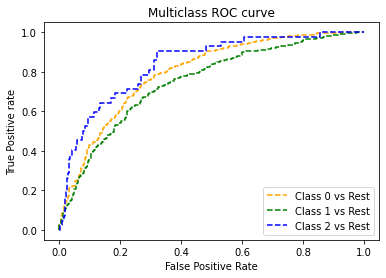

In [79]:
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

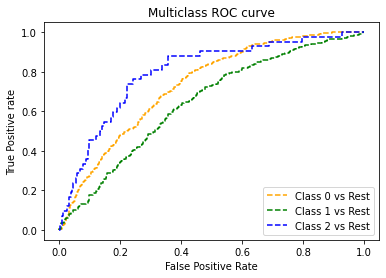

In [80]:
clf = OneVsRestClassifier(GaussianNB())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

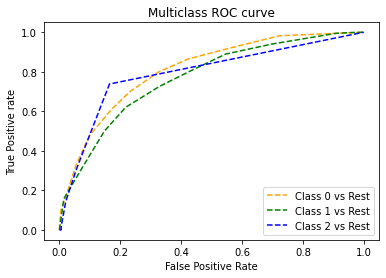

In [81]:
clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=11))
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

From the above Prediction models we can conclude that Decision Tree classifier is the best model as the Accuracy is maximum. Followed by Knn Classifier.

# Hypothesis Testing

We have take the alcohol and quality as the attributes for Hypothesis testing as alcohol increase quality of wine also incearses.

Our hypothesis is that  " There is no significance differnece in alcohol when quality of wine changes from 5 to 6 ".
Alternate hypothesis is that " There is significance differnece in alcohol when quality of wine changes from 5 to 6 ".

We calculate the mean diffence of alcohol of quality 5 with 6. We the sample the dataset and find the mean difference.We run for 5000 situmulation and find the p value and observerd diffence , which tell whether we need to reject null hypothesis or not.

In [82]:
wine_data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


In [83]:
wine_alchol_quality = wine_data [ (wine_data['quality']==5) | (wine_data['quality']==6)]
wine_alchol_quality = wine_alchol_quality[['alcohol','quality']]
wine_alchol_quality

,alcohol,quality
0,8.8,6
1,9.5,6
2,10.1,6
3,9.9,6
4,9.9,6
...,...,...
6492,10.5,5
6493,11.2,6
6494,11.0,6
6495,10.2,5


In [84]:
alcoholic_5 = wine_alchol_quality['alcohol'] [wine_alchol_quality['quality'] == 5]
alcoholic_5

10      12.0
11       9.7
12      10.8
14       9.7
19       9.5
        ... 
6480    11.9
6481     9.8
6487     9.2
6492    10.5
6495    10.2
Name: alcohol, Length: 2138, dtype: float64

In [85]:
alcoholic_6 = wine_alchol_quality['alcohol'] [wine_alchol_quality['quality'] == 6]
alcoholic_6

0        8.8
1        9.5
2       10.1
3        9.9
4        9.9
        ... 
6490    11.0
6491     9.5
6493    11.2
6494    11.0
6496    11.0
Name: alcohol, Length: 2836, dtype: float64

In [86]:
means_quality = wine_alchol_quality.groupby('quality').mean()
means_quality

,alcohol
quality,
5,9.837783
6,10.587553


In [87]:
def mean_difference(df, by ,attribute):
    means_table = df.groupby(by).mean()
    return (means_table[attribute].iloc[0]- means_table[attribute].iloc[1])

In [88]:
observed_difference =  mean_difference(wine_alchol_quality, 'quality' ,'alcohol')
observed_difference

-0.7497699166442153

In [89]:
wine_alchol_quality

,alcohol,quality
0,8.8,6
1,9.5,6
2,10.1,6
3,9.9,6
4,9.9,6
...,...,...
6492,10.5,5
6493,11.2,6
6494,11.0,6
6495,10.2,5


In [90]:
shuff = wine_alchol_quality.sample(4974 ,replace = False)
shuff

,alcohol,quality
6438,11.6,6
3295,9.4,5
3215,11.5,6
1877,10.4,6
4922,9.7,6
...,...,...
5435,10.7,6
2851,10.0,5
2541,10.6,6
3475,9.8,6


In [91]:
original_and_shuffled= wine_alchol_quality.assign(shuffled_alcohol=shuff['alcohol'].values)
original_and_shuffled

,alcohol,quality,shuffled_alcohol
0,8.8,6,11.6
1,9.5,6,9.4
2,10.1,6,11.5
3,9.9,6,10.4
4,9.9,6,9.7
...,...,...,...
6492,10.5,5,10.7
6493,11.2,6,10.0
6494,11.0,6,10.6
6495,10.2,5,9.8


In [92]:
mean_difference(original_and_shuffled, 'quality' ,'shuffled_alcohol')

0.059412402484108284

Situmalation for 5000 permutations

In [93]:
import array
differences = np.zeros(5000)
for i in np.arange(5000):
    shuffled = wine_alchol_quality.sample(4974,replace = False)
    original_and_shuffled = wine_alchol_quality.assign(shuffled_alcohol=shuffled['quality'].values )
    difference = mean_difference(original_and_shuffled, 'quality' ,'shuffled_alcohol')
    differences[i] = difference
differences_df = pd.DataFrame(differences)
differences_df

,0
0,-0.004112
1,0.005732
2,0.003271
3,0.012295
4,0.011474
...,...
4995,-0.013956
4996,0.009834
4997,0.026241
4998,0.002451


Observed Difference: -0.7497699166442153


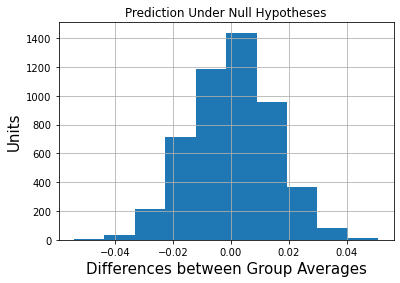

In [94]:
differences_df.hist()
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Units',fontsize=15);
print('Observed Difference:', observed_difference)

In [95]:
np.count_nonzero(differences <= observed_difference)/differences.size

0.0

Observed Difference: -0.7497699166442153


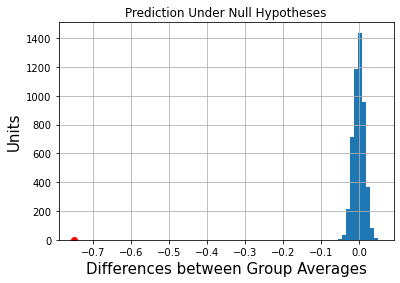

In [96]:
differences_df.hist()
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Units',fontsize=15);
plt.scatter(observed_difference, 0, color='red');
print('Observed Difference:', observed_difference)

The observed difference  is about -0.749 which doesn't appear on the horizontal scale of the histogram.Therefore Null Hypothesis is inconsistent.

So we reject Null Hypothesis. Alternate hypothesis is accepted.